In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


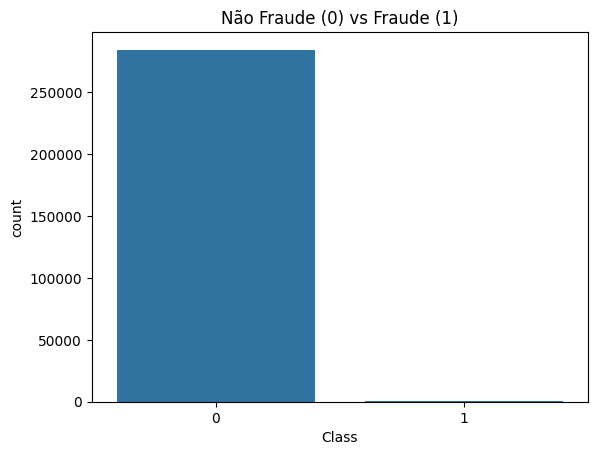

In [2]:
df = pd.read_csv('/content/drive/MyDrive/card-fraud/creditcard.csv')

# Visualizando o desbalanceamento
print(df['Class'].value_counts(normalize=True))

# Plotando
sns.countplot(x='Class', data=df)
plt.title('Não Fraude (0) vs Fraude (1)')
plt.show()

# Pré-Processamento

In [ ]:
# 1. Padronizando as colunas 'Amount' e 'Time'
scaler = RobustScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Removendo as originais
df.drop(['Time','Amount'], axis=1, inplace=True)

# 2. Separando X (dados) e y (alvo)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Divisão de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balanceamento com SMOTE

In [ ]:
# Aplicamos o SMOTE apenas nos dados de treino.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Treino original: {y_train.value_counts()}")
print(f"Treino após SMOTE: {y_train_resampled.value_counts()}")
print("---")

Treino original: Class
0    227451
1       394
Name: count, dtype: int64
Treino após SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64
---


# Treinamento e Avaliação

In [5]:
# Treinando a Regressão Logística
model = LogisticRegression(max_iter=1000) # max_iter aumentado para garantir convergência
model.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões nos dados de TESTE (que nunca viram o SMOTE)
y_pred = model.predict(X_test)

# Mostrando o resultado
print("RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred))

print("\nMATRIZ DE CONFUSÃO (Real vs Predito):")
# Formato:
# [Legítimo Correto   Legítimo Errado (Falso Positivo)]
# [Fraude Errada      Fraude Correta (Recall)]
print(confusion_matrix(y_test, y_pred))

RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


MATRIZ DE CONFUSÃO (Real vs Predito):
[[55430  1434]
 [    8    90]]


# Treinando com o Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators=100 cria 100 árvores de decisão
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 2. Previsão
y_pred_rf = rf_model.predict(X_test)

# 3. Avaliação
print("--- RANDOM FOREST ---")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

--- RANDOM FOREST ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56853    11]
 [   18    80]]


# Gráfico Final

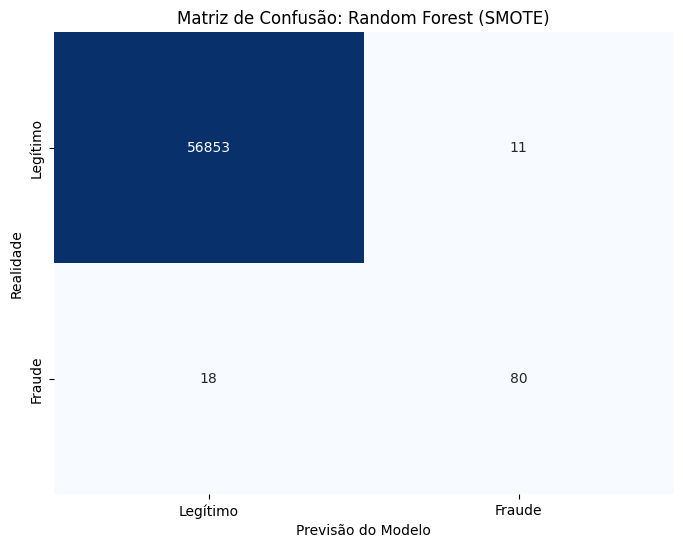

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pegando a matriz do Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Plotando
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão do Modelo')
plt.ylabel('Realidade')
plt.title('Matriz de Confusão: Random Forest (SMOTE)')
plt.xticks([0.5, 1.5], ['Legítimo', 'Fraude'])
plt.yticks([0.5, 1.5], ['Legítimo', 'Fraude'])
plt.show()